# Importación y limpieza de datos

In [5]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import unidecode

In [6]:
url = "https://repodatos.atdt.gob.mx/api_update/asea/generacion_estimada_residuos_peligrosos_tipo_residuo/ASEA_3_Generacio_n_estimada_de_residuos_peligrosos_por_tipo_de_residuo_2017-2023.csv"
archivo_salida = "residuos_peligrosos_2017_2023.csv"

response = requests.get(url)
with open(archivo_salida, "wb") as f:
    f.write(response.content)

print("Descarga completada:", archivo_salida)


Descarga completada: residuos_peligrosos_2017_2023.csv


In [7]:
df = pd.read_csv("residuos_peligrosos_2017_2023.csv")

# Renombrar columnas
nuevos_nombres = {
    "id_entidad_federaativa": "ID",
    "entidad_federativa": "estado",
    "municipio": "municipio",
    "anio": "año",
    "subsector": "subsector",
    "categoria_generador": "categoria_generador",
    "categoria_residuo": "categoria_residuo",
    "tipo_residuo": "tipo_residuo",
    "generacion_estimada": "generacion_estimada",
    "entidad_federativa_etq": "estado_etiqueta"
}

df.rename(columns=nuevos_nombres, inplace=True)
df.head(3)

,ID,estado,municipio,año,subsector,categoria_generador,categoria_residuo,tipo_residuo,generacion_estimada,estado_etiqueta
0,1,Aguascalientes,Sin Dato,2017,Petrolero,Microgenerador,"Gasolina, diesel y naftas gastados o sucios pr...",Pequeño Generador,1.22,Aguascalientes
1,1,Aguascalientes,Sin Dato,2017,Petrolero,Microgenerador,"Gasolina, diesel y naftas gastados o sucios pr...","Mezclas de combustibles sucios, mezclas de hid...",0.04,Aguascalientes
2,1,Aguascalientes,Sin Dato,2017,Petrolero,Microgenerador,Liquidos de proceso,"Agua contaminada con hidrocarburos, combustibl...",0.09,Aguascalientes


In [8]:
# Datos posiblemente unicos

print(f'ID:  {df["ID"].unique()}')
print(f'Estado:  {df["estado"].unique()}')
print(f'Año:  {df["año"].unique()}')
print(f'Subsector:  {df["subsector"].unique()}')
print(f'Categoria de generador:  {df["categoria_generador"].unique()}')
print(f'Etiquta de estado: {df["estado_etiqueta"].unique()}')

#Sin incluir municipio, categoria_residuo, tipo_residuo y generacion_estimada

ID:  [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32]
Estado:  ['Aguascalientes' 'Baja California' 'Baja California Sur' 'Campeche'
 'Coahuila de Zaragoza' 'Colima' 'Chiapas' 'Chihuahua' 'Ciudad de México'
 'Durango' 'Guanajuato' 'Guerrero' 'Hidalgo' 'Jalisco' 'México'
 'Michoacan de Ocampo' 'Michoacán de Ocampo' 'Morelos' 'Nayarit'
 'Nuevo León' 'Oaxaca' 'Puebla' 'Querétaro' 'Quintana Roo'
 'San Luis Potosí' 'Sinaloa' 'Sonora' 'Tabasco' 'Tamaulipas' 'Tlaxcala'
 'Veracruz de Ignacio de la Llave' 'Yucatán' 'Zacatecas']
Año:  [2017 2018 2019 2020 2021 2022 2023]
Subsector:  ['Petrolero' 'Petrolifero' 'Petrolífero' 'Petroleo y petroquimica'
 'Sin dato']
Categoria de generador:  ['Microgenerador' 'Pequeno Generador' 'Pequeno generador'
 'Pequeño Generador' 'Gran Generador' 'Gran generador']
Etiquta de estado: ['Aguascalientes' 'Baja California' 'Baja California Sur' 'Campeche'
 'Coahuila' 'Colima' 'Chiapas' 'Chihuahua' 'Ciudad de México' 'D

In [9]:
# Filtrar filas donde el 'subsector' es "Sin dato"
sin_dato_sub = df[df["subsector"] == "Sin dato"]
conteo_por_estado = sin_dato_sub["estado"].value_counts()
print(conteo_por_estado)

estado
Veracruz de Ignacio de la Llave    40
Name: count, dtype: int64


In [10]:
# Contar ocurrencias por tipo de categoría de residuo
conteo_residuos = df["categoria_residuo"].value_counts()
print(conteo_residuos)

categoria_residuo
Residuos sólidos                                          1081
Lodos                                                      912
Residuos solidos                                           870
Aceites gastados                                           687
Otros                                                      187
                                                          ... 
Liquidos residual es de proceso no corrosivos                1
Aguas y lodos contaminados con hidrocarburos                 1
Liquidos residuals de proceso                                1
ESCORIAS CON METALES PESADOS                                 1
Pilas baterias Zinc-Oxido de Plata usadas o desechadas       1
Name: count, Length: 88, dtype: int64


In [11]:
municipio = df["municipio"].value_counts()
print(municipio)

municipio
Sin Dato                  4084
Tuxpan                      33
Veracruz                    30
Mérida                      28
Juárez                      28
                          ... 
Ozuluama de Mascareñas       1
Ahumada                      1
Chiapa de Corzo              1
Meoqui                       1
Jalacingo                    1
Name: count, Length: 462, dtype: int64


Agrupar por municipios ya es confiable, ya que de 6375 datos, 4084 no tienen valor.

In [12]:
tipo_residuo = df["tipo_residuo"].value_counts()
print(tipo_residuo)

tipo_residuo
Estopa, trapo, plásticos, cartón, madera, brochas, papel, cepillo, etc., impregnados con pinturas, grasas, aceites, hidrocarburos    914
Lodos aceitosos                                                                                                                      805
Lubricantes                                                                                                                          489
Baterias, pilas y balastras                                                                                                          202
Agua contaminada con hidrocarburos, combustibles, aceite o grasa                                                                     184
                                                                                                                                    ... 
solidos OTROS (ELEMENTOS FILTRANTES GASTADOS IMPREGNADOS DE ACEITE)                                                                    1
solidos OTROS (solidos IMPRE

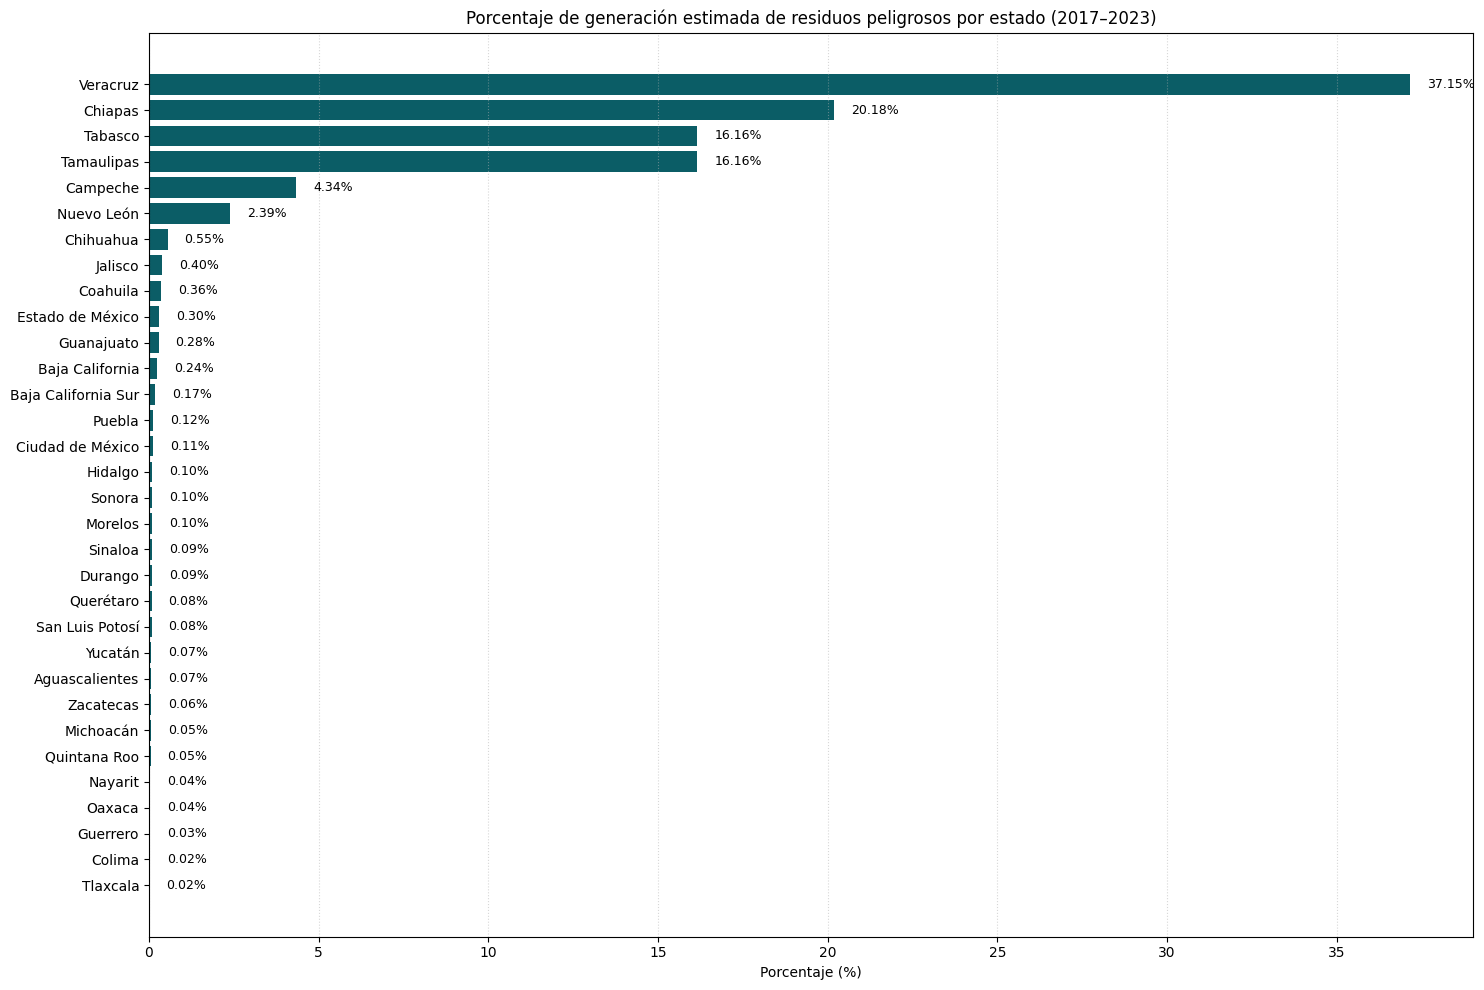

In [13]:
# Visualización de 
generacion_total = df.groupby("estado_etiqueta")["generacion_estimada"].sum()
porcentaje_estado = (generacion_total / generacion_total.sum()) * 100
porcentaje_estado = porcentaje_estado.sort_values(ascending=True)  # Para graficar de abajo hacia arriba

plt.figure(figsize=(15, 10))
bars = plt.barh(porcentaje_estado.index, porcentaje_estado.values, color="#0b5d66")

for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.5, bar.get_y() + bar.get_height()/2,
             f"{width:.2f}%", va='center', fontsize=9, color='black')

plt.title("Porcentaje de generación estimada de residuos peligrosos por estado (2017–2023)")
plt.xlabel("Porcentaje (%)")
plt.grid(axis='x', linestyle=':', alpha=0.5)
plt.tight_layout()
plt.show()

plt.show()

1. La variable "Estado" no relaciona de forma correcta los datos, se debe de usar "estado_etiqueta"
2. No se entrega una unidad de medida para la generación estimada, se recomienda utilizar porcentaje

In [14]:
# Crear nuevo DataFrame excluyendo las columnas 'estado' y 'municipio'
df1 = df.drop(columns=["estado", "municipio", "tipo_residuo"])
df1.head()

,ID,año,subsector,categoria_generador,categoria_residuo,generacion_estimada,estado_etiqueta
0,1,2017,Petrolero,Microgenerador,"Gasolina, diesel y naftas gastados o sucios pr...",1.22,Aguascalientes
1,1,2017,Petrolero,Microgenerador,"Gasolina, diesel y naftas gastados o sucios pr...",0.04,Aguascalientes
2,1,2017,Petrolero,Microgenerador,Liquidos de proceso,0.09,Aguascalientes
3,1,2017,Petrolero,Microgenerador,Lodos aceitosos,1.08,Aguascalientes
4,1,2017,Petrolero,Microgenerador,Residuos solidos,3.12,Aguascalientes


In [15]:
# Filtrar filas donde 'categoria_residuo' tiene más de 2 espacios
filtro = df["categoria_residuo"].apply(lambda x: isinstance(x, str) and x.count(" ") > 2)
print(df.loc[filtro, "categoria_residuo"].unique())


['Gasolina, diesel y naftas gastados o sucios provenientes de estaciónes de servicio y talleres automotrices'
 'Filtro de aire o aceite contaminados' 'Diesel y gasolina sucias'
 'Lamparas fluorescentes y de vapor de mercurio'
 'Liquidos residuales de proceso no corrosivos'
 'Lodos Contaminados con Hidrocarburos (combustible y aceites)'
 'Lodos de tanques de almacenamiento de hidrocarburos'
 'Solidos contaminados con hidrocarburos diversos'
 'Pilas o Baterias con Litio o Cadmio'
 'Solidos contaminados con pinturas o solventes diversos'
 'Baterias, celdas y pilas' 'Gasollina, diésel y naftas gastados'
 'Lámparas fluorescentes y de vapor de mercurio'
 'Baterias, pilas y balastras'
 'Gasolina, diésel y naftas gastados o sucios provenientes de estaciones de servicio y talleres automotrices'
 'baterias, celdas y pilas' 'Pinturas y productos relacionados'
 'Gasolina, Diesel y Naftas gastados o sucios'
 'Liquidos residuales de proceso corrosivos'
 'Lodos Contaminados con Hidrocarburos'
 'Solid

In [16]:
# Filtrar filas donde 'categoria_residuo' tiene 2 o menos espacios
filtro_menos_igual_2 = df["categoria_residuo"].apply(lambda x: isinstance(x, str) and x.count(" ") <= 2)
print(df.loc[filtro_menos_igual_2, "categoria_residuo"].unique())


['Liquidos de proceso' 'Lodos aceitosos' 'Residuos solidos'
 'Aceites gastados' 'Lodos' 'Solventes' 'Aceites gastados (Hidraulicos)'
 'Aceites gastados (Lubricantes)' 'Baterias alcalinas'
 'Aceites lubricantes' 'Líquidos de proceso' 'Residuos sólidos' 'Otros'
 'Agua contaminada' 'Escorias' 'Metales' 'Lamparas fluorescentes'
 'Solventes Gastados' 'Solidos' 'Sólidos' 'Biológico-infecciosos'
 'Solidos impregnados' 'Aceites hidraúlicos' 'Material textil'
 'Productos químicos caducos' 'Sustancias corrosivas' 'Natas de pintura'
 'Residuos Liquidos' 'solidos' 'Botes de Presurizados' 'ACEITES GASTADOS'
 'OTROS' 'SÓLIDOS' 'SOLVENTES' 'Anticongelante' 'Lodos provenientes de'
 'Otros residuos peligrosos' 'Biologico-infecciosos'
 'Residuos punzocortantes' 'LODOS ACEITOSOS' 'Residuos No Anatomicos'
 'Biologico- Infecciosos' 'LODOS PROVENIENTES DE:' 'SUSTANCIAS CORROSIVAS'
 'Biológico infeccioso' 'Lodos provenientes de:' 'Sin dato'
 'Biológico-Infecciosos']


In [17]:

# Función de normalización
def normalizar(texto):
    texto = unidecode.unidecode(str(texto).lower())
    texto = texto.replace(",", "")  # quitar comas
    texto = " ".join(texto.strip().split())
    return texto

# Diccionario de unificación (ejemplo parcial, reemplaza con el tuyo completo)
mapa_unificacion = {
    "gasolina diesel y naftas gastados o sucios": "residuos de hidrocarburos",
    "gasollina diesel y naftas gastados": "residuos de hidrocarburos",
    "gasolina diesel y naftas gastados o sucios provenientes de estaciones de servicio y talleres automotrices": "residuos de hidrocarburos",
    "gasolina diesel y naftas gastados o sucios provenientes de estacion es de servicio y talleres automotrices": "residuos de hidrocarburos",
    "diesel y gasolina sucias": "residuos de hidrocarburos",
    
    "baterias celdas y pilas": "baterías y pilas",
    "baterias pilas y balastras": "baterías y pilas",
    "baterias pilas zinc-oxido de plata usadas o desechadas": "baterías y pilas",
    "baterías alcalinas":"baterías y pilas",
    "pilas o baterias con litio o cadmio": "baterías y pilas",
    "baterias y pilas":"baterías y pilas",
    'pilas baterias zinc-oxido de plata usadas o desechadas':'baterías y pilas',
    
    "liquidos residuales de proceso": "líquidos de proceso",
    "liquidos residual es de proceso no corrosivos": "líquidos de proceso",
    "liquidos residuales de proceso no corrosivos": "líquidos de proceso",
    "liquidos residuals de proceso": "líquidos de proceso",
    "liquidos residuales de procesos": "líquidos de proceso",
    "liquidos residuales de proceso corrosivos": "líquidos de proceso",
    "aguas y lodos contaminados con hidrocarburos": "líquidos de proceso",
    "lamparas fluorescentes y de vapor de mercurio": "lámparas fluorescentes",
    "lamparas fluorescentes": "lámparas fluorescentes",
    "lodos contaminados con hidrocarburos": "lodos contaminados con hidrocarburos",
    "lodos contaminados con hidrocarburos (combustible y aceites)": "lodos contaminados con hidrocarburos",
    "lodos de tanques de almacenamiento de hidrocarburos": "lodos contaminados con hidrocarburos",
    "solidos contaminados con hidrocarburos": "sólidos contaminados",
    "solidos contaminados con hidrocarburos diversos": "sólidos contaminados",
    "solidos de mantenimiento impregnados con hidrocarburos": "sólidos contaminados",
    "solidos de mantenimiento impregnados con hidrocarburo": "sólidos contaminados",
    "solidos contaminados con pinturas": "sólidos contaminados",
    "solidos contaminados con pinturas o solventes diversos": "sólidos contaminados",
    "solidos contaminados con pinturas o solventes diverso": "sólidos contaminados",
    "residuos de pinturas y esmaltes": "pinturas y productos relacionados",
    "residuos de pigmentos base cromo y base plomo": "pinturas y productos relacionados",
    "pinturas y productos relacionados": "pinturas y productos relacionados",
    "escorias con metales pesados": "escorias",
    "filtro de aire o aceite contaminados": "filtros contaminados",
    "aceites gastados": "aceites gastados",
    "aceites gastados (hidraulicos)": "aceites gastados",
    "aceites gastados (lubricantes)": "aceites gastados",
    "aceites hidraulicos": "aceites hidráulicos",
    "aceites lubricantes": "aceites lubricantes",
    "agua contaminada": "agua contaminada",
    "anticongelante": "anticongelante",
    "baterias alcalinas": "baterías alcalinas",
    "biologico infeccioso": "biológico infeccioso",
    "biologico- infecciosos": "biológico infeccioso",
    "biologico-infecciosos": "biológico infeccioso",
    "botes de presurizados": "botes presurizados",
    "escorias": "escorias",
    "lamparas fluorescentes": "lámparas fluorescentes",
    "liquidos de proceso": "líquidos de proceso",
    
    "lodos": "lodos",
    "lodos aceitosos": "lodos aceitosos",
    "lodos provenientes de": "lodos",
    "lodos provenientes de:": "lodos",
    'lodos contaminados con hidrocarburo':'lodos',
    
    "material textil": "material textil",
    "metales": "metales",
    "natas de pintura": "natas de pintura",
    "otros": "otros",
    "otros residuos peligrosos": "otros",
    "productos quimicos caducos": "productos químicos caducos",
    "residuos liquidos": "residuos líquidos",
    "residuos no anatomicos": "residuos no anatómicos",
    "residuos punzocortantes": "residuos punzocortantes",
    "residuos solidos": "sólidos",
    "sin dato": "sin datos",
    "solidos": "sólidos",
    "solidos impregnados": "sólidos",
    'solidos contaminados':'sólidos',
    "solventes": "solventes",
    "solventes gastados": "solventes",
    "sustancias corrosivas": "sustancias corrosivas"
}

# Aplicar limpieza a columna

# Normalizar la columna completa primero
df["categoria_residuo"] = df["categoria_residuo"].apply(normalizar)

# Luego aplicar el mapeo de unificación
df["categoria_residuo"] = df["categoria_residuo"].apply(lambda x: mapa_unificacion.get(x, x))

# Crear nuevo DataFrame limpio
df2 = df.drop(columns=["estado", "municipio"]).copy()


In [18]:
valores_actuales = set(df["categoria_residuo"].unique())
valores_mapeados = set(mapa_unificacion.values())
faltantes = valores_actuales - valores_mapeados

print("Valores no unificados:")
print(sorted(faltantes))

Valores no unificados:
[]


In [19]:
print(df2["categoria_residuo"].unique())

['residuos de hidrocarburos' 'líquidos de proceso' 'lodos aceitosos'
 'sólidos' 'aceites gastados' 'lodos' 'solventes' 'filtros contaminados'
 'lámparas fluorescentes' 'lodos contaminados con hidrocarburos'
 'sólidos contaminados' 'baterías alcalinas' 'baterías y pilas'
 'aceites lubricantes' 'otros' 'agua contaminada' 'escorias' 'metales'
 'pinturas y productos relacionados' 'biológico infeccioso'
 'aceites hidráulicos' 'material textil' 'productos químicos caducos'
 'sustancias corrosivas' 'natas de pintura' 'residuos líquidos'
 'botes presurizados' 'anticongelante' 'residuos punzocortantes'
 'residuos no anatómicos' 'sin datos']


In [20]:
df2.head(3)

,ID,año,subsector,categoria_generador,categoria_residuo,tipo_residuo,generacion_estimada,estado_etiqueta
0,1,2017,Petrolero,Microgenerador,residuos de hidrocarburos,Pequeño Generador,1.22,Aguascalientes
1,1,2017,Petrolero,Microgenerador,residuos de hidrocarburos,"Mezclas de combustibles sucios, mezclas de hid...",0.04,Aguascalientes
2,1,2017,Petrolero,Microgenerador,líquidos de proceso,"Agua contaminada con hidrocarburos, combustibl...",0.09,Aguascalientes


In [21]:
# Función de normalización genérica
def normalizar(texto):
    texto = unidecode.unidecode(str(texto).lower())
    texto = " ".join(texto.strip().split())
    return texto

# Diccionarios de unificación
mapa_subsector = {
    "petrolero": "petrolero",
    "petrolifero": "petrolífero",
    "petrolífero": "petrolífero",
    "petroleo y petroquimica": "petróleo y petroquímica",
    "sin dato": "sin datos"
}

mapa_generador = {
    "microgenerador": "microgenerador",
    "pequeno generador": "pequeño generador",
    "pequeno generador": "pequeño generador",
    "pequeño generador": "pequeño generador",
    "gran generador": "gran generador"
}

# Aplicar limpieza
df2["subsector"] = df2["subsector"].apply(lambda x: mapa_subsector.get(normalizar(x), normalizar(x)))
df2["categoria_generador"] = df2["categoria_generador"].apply(lambda x: mapa_generador.get(normalizar(x), normalizar(x)))


In [22]:
print(df2["subsector"].unique())
print(df2["categoria_generador"].unique())

['petrolero' 'petrolífero' 'petróleo y petroquímica' 'sin datos']
['microgenerador' 'pequeño generador' 'gran generador']


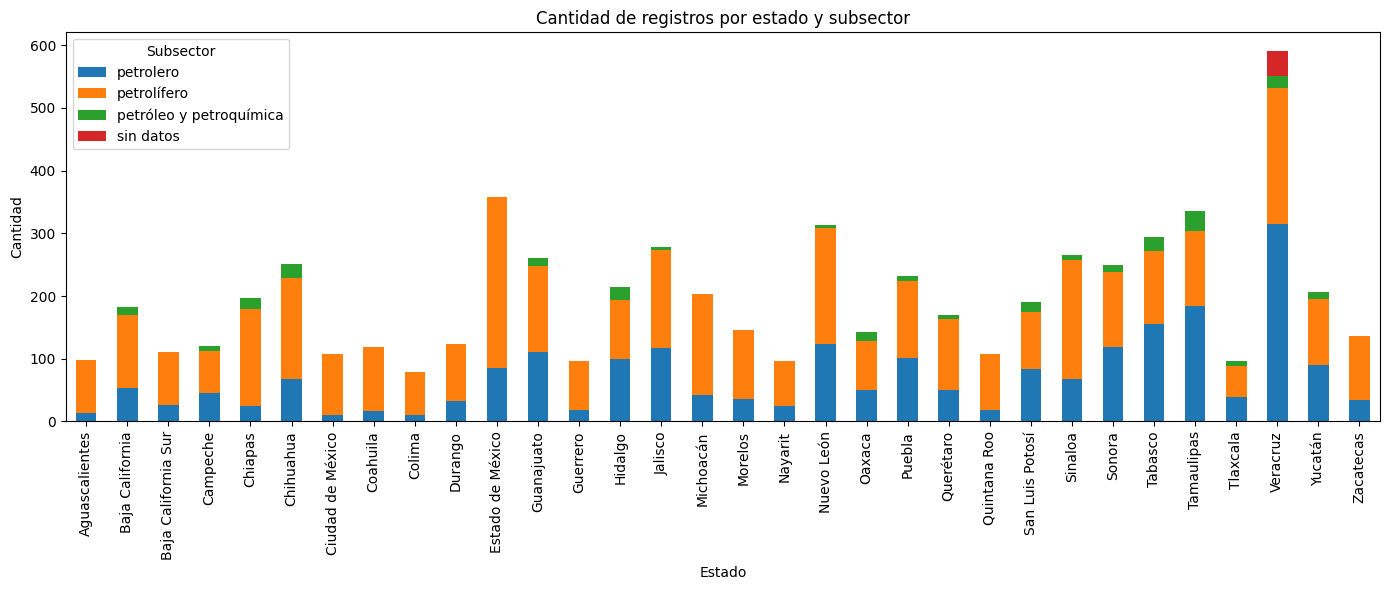

In [23]:
conteo_subsector = df2.groupby(["estado_etiqueta", "subsector"]).size().unstack(fill_value=0)
fig, ax = plt.subplots(figsize=(14, 6))

conteo_subsector.plot(kind="bar", stacked=True, ax=ax)

ax.set_title("Cantidad de registros por estado y subsector")
ax.set_xlabel("Estado")
ax.set_ylabel("Cantidad")
ax.legend(title="Subsector")
ax.tick_params(axis='x', rotation=90)
fig.tight_layout()



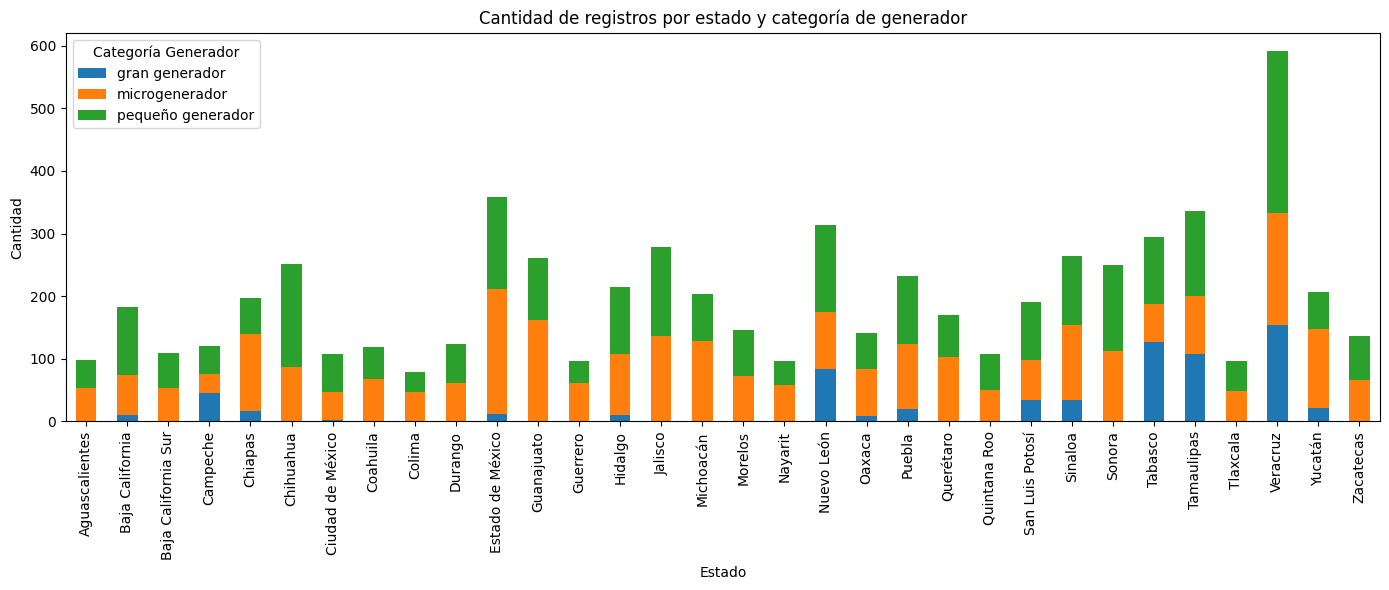

In [24]:
conteo_generador = df2.groupby(["estado_etiqueta", "categoria_generador"]).size().unstack(fill_value=0)
fig, ax = plt.subplots(figsize=(14, 6))

conteo_generador.plot(kind="bar", stacked=True, ax=ax)
ax.set_title("Cantidad de registros por estado y categoría de generador")
ax.set_xlabel("Estado")
ax.set_ylabel("Cantidad")
ax.legend(title="Categoría Generador")
ax.tick_params(axis='x', rotation=90)
fig.tight_layout()

plt.show()

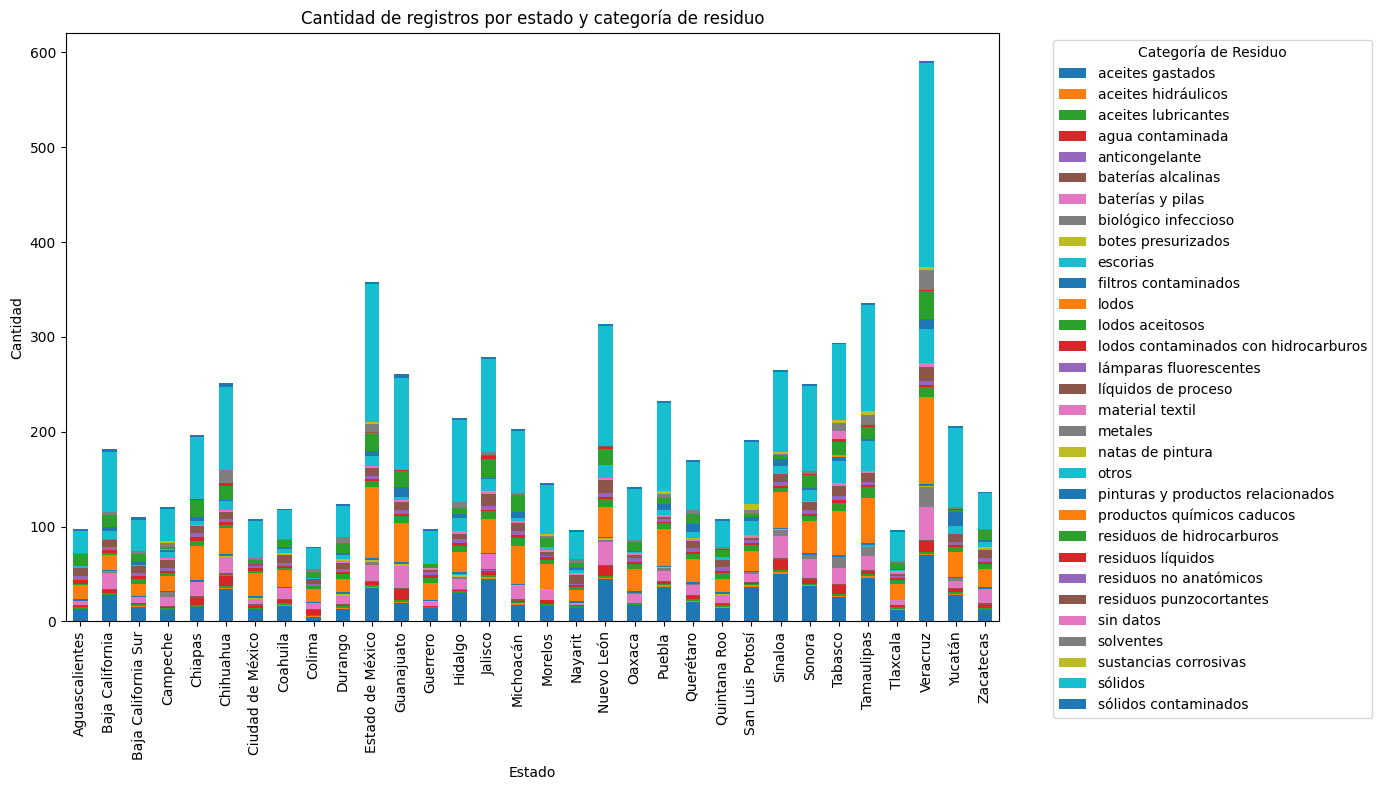

In [25]:
# Agrupar y contar
conteo_residuo = df2.groupby(["estado_etiqueta", "categoria_residuo"]).size().unstack(fill_value=0)

# Crear figura y eje
fig, ax = plt.subplots(figsize=(14, 8))

# Graficar barras apiladas
conteo_residuo.plot(kind="bar", stacked=True, ax=ax)

# Personalización
ax.set_title("Cantidad de registros por estado y categoría de residuo")
ax.set_xlabel("Estado")
ax.set_ylabel("Cantidad")
ax.legend(title="Categoría de Residuo", bbox_to_anchor=(1.05, 1), loc="upper left")
ax.tick_params(axis='x', rotation=90)
fig.tight_layout()

plt.show()


In [26]:
df2.to_csv("df_limpio.csv", index=False, encoding="utf-8")